In [1]:
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import json
import os
#warnings.filterwarnings("ignore", category=DeprecationWarning) 
#%matplotlib inline

generate data

In [ ]:
#cores
N=16
#secs
M=1024
x={}

for i in range(1,N+1):
    x[i]=[]
    for j in range(1,M+1):
        x[i].append(j/i)
df = pd.DataFrame(data=x,index=range(1,M+1))
df

In [ ]:
df.to_csv("output.csv")

Read

In [ ]:
data = pd.read_csv('output.csv',index_col=['Unnamed: 0'])
data.sample(10)

In [ ]:
data.head()

In [ ]:
data_train=pd.DataFrame(columns=['program','cores','paramsvector','time'])

In [ ]:
k=0
dlist=[]
for i in range(0,len(data)):
    for j in range(1,len(data.columns)+1):
        dict={}
        dict['time']=data.iloc[i][str(j)]
        dict['cores']=j
        dict['paramsvector']=[i+1]
        cmd="sh -lc \'python3 run.py {} {} > /output/test.txt\'".format(dict['paramsvector'][0],dict['cores'])
        dict['program']={'image': 'als23/sleep:latest', 'cmd': cmd}
        data_train.loc[k]=dict
        dlist.append(dict)
        k+=1

In [ ]:
data_train.sample(10)

In [ ]:
with open("outputSleepSim.json", "w") as f:
    json.dump(dlist, f)

Monte-Carlo

In [13]:
path = "../outputSleep.json"

def load_data():
    if not os.path.isfile(path):
        return []
    with open(path, "r") as json_data:
        statelist = json.load(json_data)
        if isinstance(statelist, list):
            return statelist
        return []

In [14]:
pd.set_option('display.max_colwidth', -1)

In [15]:
d=load_data()
df=pd.DataFrame.from_records(d,index=range(1,len(d)+1))

# statelist=[]
# with open("f.json", "r") as json_data:
#     statelist = json.load(json_data)
    
df=pd.DataFrame.from_records(d,index=range(1,len(d)+1))
df.head()

,cores,paramsvector,program,time
1,14,[60],"{'image': 'als23/sleep:latest', 'cmd': 'sh -lc 'python3 run.py 60 14 > /output/test.txt''}",4.292906
2,15,[60],"{'image': 'als23/sleep:latest', 'cmd': 'sh -lc 'python3 run.py 60 15 > /output/test.txt''}",4.006929
3,5,[60],"{'image': 'als23/sleep:latest', 'cmd': 'sh -lc 'python3 run.py 60 5 > /output/test.txt''}",12.013590
4,12,[60],"{'image': 'als23/sleep:latest', 'cmd': 'sh -lc 'python3 run.py 60 12 > /output/test.txt''}",5.007390
5,16,[60],"{'image': 'als23/sleep:latest', 'cmd': 'sh -lc 'python3 run.py 60 16 > /output/test.txt''}",3.756186


df=df.sort_values(by=["cores"])

df.head()

df = df.reset_index(drop=True)
pd.set_option('display.max_colwidth', -1)
df.index=range(1,len(d)+1)

df.head()

#plot1=df.time.plot.line(figsize=(50,30))
#fig1 = plot1.get_figure()
#fig1.savefig('linefig1.png', dpi=100)

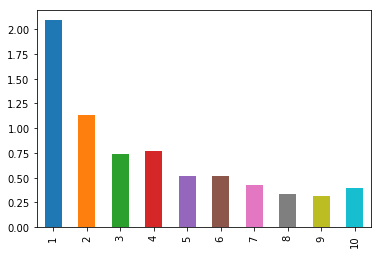

In [12]:
plot2=df.time.plot.bar()
fig2 = plot2.get_figure()
fig2.savefig('barfig3.png', dpi=100)

Training

def convert_features(data):
    conv_data = data.copy()
   
    #преобразование номинальных признаков
    nom_df = conv_data[['cores', 'paramsvector' ]]
    conv_data = conv_data.drop(nom_df.columns, axis=1)
    nom_df = pd.get_dummies(nom_df)
    conv_data = pd.concat([conv_data, nom_df], axis = 1)
    
    return conv_data

#conv_data= convert_features(df2)

In [5]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.ensemble import RandomForestRegressor as rfr
import json

clf=rfr()

In [6]:
X = df.drop(['time'],axis=1)
y = df.time
X.head()

,cores,paramsvector,program
1,1,[2520000],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 2520000 1 > /output/test.txt''}"
2,2,[2520000],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 2520000 2 > /output/test.txt''}"
3,4,[2520000],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 2520000 4 > /output/test.txt''}"
4,3,[2520000],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 2520000 3 > /output/test.txt''}"
5,7,[2520000],"{'image': 'als23/montecarlo:latest', 'cmd': 'sh -lc 'python3 run.py 2520000 7 > /output/test.txt''}"


In [7]:
X.program=X.program.apply(lambda x: json.dumps(x))
X.paramsvector=X.paramsvector.apply(lambda x: x[0])

# docs=["{\"image\": ","\"als23/sleep:latest\"",",","\"cmd\": ", "\"sh -lc \'python3 run.py","> /output/test.txt\'\""]
data_train = X
data_train.head()

,cores,paramsvector,program
1,1,2520000,"{""image"": ""als23/montecarlo:latest"", ""cmd"": ""sh -lc 'python3 run.py 2520000 1 > /output/test.txt'""}"
2,2,2520000,"{""image"": ""als23/montecarlo:latest"", ""cmd"": ""sh -lc 'python3 run.py 2520000 2 > /output/test.txt'""}"
3,4,2520000,"{""image"": ""als23/montecarlo:latest"", ""cmd"": ""sh -lc 'python3 run.py 2520000 4 > /output/test.txt'""}"
4,3,2520000,"{""image"": ""als23/montecarlo:latest"", ""cmd"": ""sh -lc 'python3 run.py 2520000 3 > /output/test.txt'""}"
5,7,2520000,"{""image"": ""als23/montecarlo:latest"", ""cmd"": ""sh -lc 'python3 run.py 2520000 7 > /output/test.txt'""}"


In [8]:
from sklearn import preprocessing

In [9]:
features = ['program']
le= preprocessing.LabelEncoder()

In [10]:
df_combined = X[features]
    
for feature in features:
    le = le.fit(df_combined[feature])
    data_train[feature] = le.transform(df_combined[feature])
    
data_train.head()

,cores,paramsvector,program
1,1,2520000,0
2,2,2520000,2
3,4,2520000,4
4,3,2520000,3
5,7,2520000,7


In [11]:
clf.fit(data_train,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
to_predict=[{"cores": 4, "program": {"image": "als23/sleep:latest", "cmd": "sh -lc 'python3 run.py 60 4 > /output/test.txt'"},
                         "paramsvector": [60]}]

In [70]:
data_test = pd.DataFrame.from_records(to_predict)
data_test.program=data_test.program.apply(lambda x: json.dumps(x))
data_test.paramsvector=data_test.paramsvector.apply(lambda x: x[0])
data_test.head()

,cores,paramsvector,program
0,4,60,"{""image"": ""als23/sleep:latest"", ""cmd"": ""sh -lc 'python3 run.py 60 4 > /output/test.txt'""}"


In [71]:
df_combined = data_test[features]

for feature in features:
    #le = le.fit(df_combined[feature])
    data_test[feature] = le.transform(df_combined[feature])

data_test.head()

,cores,paramsvector,program
0,4,60,9306


In [72]:
clf.predict(data_test)

array([15.])

In [13]:
le

LabelEncoder()

In [73]:
24.9+12.475+15

52.375